# create repackaged WOA DATA for each Dataset

In [3]:
import math
import numpy as np
from scipy.io import netcdf
from scipy.interpolate import interp1d

import glob
import xarray as xr

## read the necessary data:

In [4]:
mld1 = xr.open_dataset('MLDClimatology_DeBoyerMontagut/2019_11_07_data_L3_mldmindtr02_c1m_sameasSent2MHRio20141103__Sent2BenjaminPostUcsdBremen/mld_mindtr02_l3.nc')

In [5]:
mld1

<xarray.Dataset>
Dimensions:                             (lat: 90, lon: 180, nlines1: 1178, nlines2: 4, nlines3: 236, nprf: 1884287, time: 12)
Coordinates:
  * lon                                 (lon) float32 -179.0 -177.0 ... 179.0
  * lat                                 (lat) float32 -89.0 -87.0 ... 87.0 89.0
  * time                                (time) int32 14 45 73 ... 287 318 348
Dimensions without coordinates: nlines1, nlines2, nlines3, nprf
Data variables:
    n_stations                          (time, lat, lon) int32 ...
    mld_mindtr02                        (time, lat, lon) float32 ...
    mld_mindtr02_rmoutliers             (time, lat, lon) float32 ...
    mld_mindtr02_rmoutliers_smth        (time, lat, lon) float32 ...
    mld_mindtr02_rmoutliers_smth_okrg   (time, lat, lon) float32 ...
    mask                                (lat, lon) int16 ...
    jpi_prf                             (nprf) int32 ...
    jpj_prf                             (nprf) int32 ...
    var_pr

In [6]:
"""
ncfile = netcdf.netcdf_file('MLDClimatology_DeBoyerMontagut/2019_11_07_data_L3_mldmindtr02_c1m_sameasSent2MHRio20141103__Sent2BenjaminPostUcsdBremen/mld_mindtr02_l3.nc', 'r')

nclat = ncfile.variables['lat'].data.copy()
nclon = ncfile.variables['lon'].data.copy()
nctime = ncfile.variables['time'].data.copy()
ncmld = ncfile.variables['mld_mindtr02_rmoutliers_smth_okrg'].data.copy()

ncfile.close()

times, nclats, nclons = np.meshgrid(nctime, nclat, nclon, indexing='ij')
"""

"\nncfile = netcdf.netcdf_file('MLDClimatology_DeBoyerMontagut/2019_11_07_data_L3_mldmindtr02_c1m_sameasSent2MHRio20141103__Sent2BenjaminPostUcsdBremen/mld_mindtr02_l3.nc', 'r')\n\nnclat = ncfile.variables['lat'].data.copy()\nnclon = ncfile.variables['lon'].data.copy()\nnctime = ncfile.variables['time'].data.copy()\nncmld = ncfile.variables['mld_mindtr02_rmoutliers_smth_okrg'].data.copy()\n\nncfile.close()\n\ntimes, nclats, nclons = np.meshgrid(nctime, nclat, nclon, indexing='ij')\n"

In [7]:
def readWOAdata(filepath,variable):
    TempNCDFfiles = glob.glob(filepath, recursive=True)
    WOAfile = xr.open_mfdataset(TempNCDFfiles,combine='by_coords',decode_times=False, parallel=True)
    WOAdat = WOAfile.sel(nbounds=0)
    return WOAdat

In [8]:
WOAtemp = readWOAdata('WOA2018/Temperature/*.nc','t_an')

In [9]:
#WOAtemp

In [10]:
def filterNearestMLD_XR(Lat,Lon):
    """this function checks 1. if lat lon point is in the ocean, then 2. returns MLD climatology"""
    lsx = nclandseafile.sel(lat=Lat,lon=Lon, method='nearest')['watermask'].values

    if lsx != 1:
        return np.array([])
    else:
        return mld1.sel(lat=Lat,lon=Lon,method='nearest')['mld_mindtr02_rmoutliers_smth_okrg']

In [11]:
def TempAboveMLD_XR(Lat,Lon):
    """this function checks 1. if lat lon point is in the ocean, then 2. returns MLD climatology"""
    lsx = nclandseafile.sel(lat=Lat,lon=Lon, method='nearest')['watermask'].values

    if lsx != 1:
        return np.array([])
    else:
        mld1.sel(lat=Lat,lon=Lon,method='nearest')['mld_mindtr02_rmoutliers_smth_okrg']

In [12]:
#WOAtemp.sel(lat=40.5, lon=-20.5, time=372.5)['t_an'].interp(depth=range(0,200)).mean().values

In [13]:
#['t_an'].interp(depth=range(0,200)).mean().values

In [14]:
mld = xr.Dataset({'lat': mld1['lat'], 'lon': mld1['lon'], 'time':mld1['time'], 'mld':mld1['mld_mindtr02_rmoutliers_smth_okrg']})

In [15]:
mld['time'].values = range(1,13)

In [16]:
temp = xr.Dataset({'lat': WOAtemp['lat'], 'lon': WOAtemp['lon'], 'time':WOAtemp['time'], 'depth':WOAtemp['depth'], 't_an':WOAtemp['t_an']})

In [17]:
temp['time'].values = range(1,13)

In [18]:
WOAtemp.close()

In [19]:
mld1.close()

In [20]:
temp, mld

(<xarray.Dataset>
 Dimensions:  (depth: 57, lat: 180, lon: 360, time: 12)
 Coordinates:
   * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 1350.0 1400.0 1450.0 1500.0
   * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
   * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
 Data variables:
     t_an     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:  (lat: 90, lon: 180, time: 12)
 Coordinates:
   * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
   * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
 Data variables:
     mld      (time, lat, lon) float32 ...)

In [21]:
temp_test = temp[{'lat': slice(None, None, 15), 'lon': slice(None, None, 15)}]

In [22]:
temp_test_chunked = temp_test.chunk({'lat': 60, 'lon': 120})

In [23]:
temp_test_stacked = temp_test_chunked.stack(gridcell=['lon', 'lat','time'])

In [24]:
temp_test_stacked.chunks

Frozen(SortedKeysDict({'depth': (57,), 'gridcell': (288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288)}))

In [ ]:
temp_chunked = temp.chunk({'lat': 60, 'lon': 120})
temp_stacked = temp_chunked.stack(gridcell=['lon', 'lat','time'])

In [20]:
temp_chunked = temp.chunk({'lat': 60, 'lon': 120})
temp_stacked = temp_chunked.stack(gridcell=['lon', 'lat','time'])

In [21]:
import dask

In [1]:
from dask.distributed import Client, LocalCluster

In [2]:
lc = LocalCluster(n_workers=1)
client = Client(lc)
client

Client Scheduler: tcp://127.0.0.1:60955 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 8 Memory: 17.18 GB


In [25]:
temp_test_stacked.t_an

<xarray.DataArray 't_an' (depth: 57, gridcell: 3456)>
dask.array<reshape, shape=(57, 3456), dtype=float32, chunksize=(57, 288), chunktype=numpy.ndarray>
Coordinates:
  * depth     (depth) float32 0.0 5.0 10.0 15.0 ... 1350.0 1400.0 1450.0 1500.0
  * gridcell  (gridcell) MultiIndex
  - lon       (gridcell) float64 -179.5 -179.5 -179.5 ... 165.5 165.5 165.5
  - lat       (gridcell) float64 -89.5 -89.5 -89.5 -89.5 ... 75.5 75.5 75.5 75.5
  - time      (gridcell) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [26]:
ssh = temp.t_an
ssh

<xarray.DataArray 't_an' (depth: 57, gridcell: 3456)>
dask.array<reshape, shape=(57, 3456), dtype=float32, chunksize=(57, 288), chunktype=numpy.ndarray>
Coordinates:
  * depth     (depth) float32 0.0 5.0 10.0 15.0 ... 1350.0 1400.0 1450.0 1500.0
  * gridcell  (gridcell) MultiIndex
  - lon       (gridcell) float64 -179.5 -179.5 -179.5 ... 165.5 165.5 165.5
  - lat       (gridcell) float64 -89.5 -89.5 -89.5 -89.5 ... 75.5 75.5 75.5 75.5
  - time      (gridcell) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

In [29]:
ssh_2015_mean = ssh.mean(dim='depth')

In [30]:
ssh_2015_mean.load()

<xarray.DataArray 't_an' (gridcell: 3456)>
array([       nan,        nan,        nan, ..., -1.34849  , -1.4476744,
       -1.2366421], dtype=float32)
Coordinates:
  * gridcell  (gridcell) MultiIndex
  - lon       (gridcell) float64 -179.5 -179.5 -179.5 ... 165.5 165.5 165.5
  - lat       (gridcell) float64 -89.5 -89.5 -89.5 -89.5 ... 75.5 75.5 75.5 75.5
  - time      (gridcell) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

In [35]:
def standardize(x):
    Xlat = x.gridcell.values.item(0)[1]
    Xlon = x.gridcell.values.item(0)[0]
    Xtime = x.gridcell.values.item(0)[2]
    mld_dep = mld.sel(lat=Xlat, lon=Xlon, time=Xtime, method='nearest')['mld'].values.item(0)
    #print(lat,lon,time,mld_dep,type(mld_dep))
    if np.isnan(mld_dep):
        #print(xr.Dataset({'t_an':np.nan},coords={'gridcell':x.gridcell}))
        return xr.Dataset({'t_an':np.nan},coords={'gridcell':x.gridcell})
    else:
        #print((x.interp(depth=range(0,int(mld_dep))).mean()))
        return (x.interp(depth=range(0,int(mld_dep))).mean())
    
def standout(x):
    print(x,type(x))
    x_tts = x.groupby('gridcell')
    return xr.apply_ufunc(standardize, x, dask='allowed')

In [36]:
out = standout(temp_test_stacked)

#.apply_ufunc(standardize, dask='parallel').unstack('gridcell')


<xarray.Dataset>
Dimensions:   (depth: 57, gridcell: 3456)
Coordinates:
  * depth     (depth) float32 0.0 5.0 10.0 15.0 ... 1350.0 1400.0 1450.0 1500.0
  * gridcell  (gridcell) MultiIndex
  - lon       (gridcell) float64 -179.5 -179.5 -179.5 ... 165.5 165.5 165.5
  - lat       (gridcell) float64 -89.5 -89.5 -89.5 -89.5 ... 75.5 75.5 75.5 75.5
  - time      (gridcell) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    t_an      (depth, gridcell) float32 dask.array<chunksize=(57, 288), meta=np.ndarray> <class 'xarray.core.dataset.Dataset'>


AttributeError: 'Array' object has no attribute 'gridcell'

In [ ]:
out_comp = out.to_netcdf('tmld_data_02.nc',compute=False)

In [ ]:
from dask.diagnostics import ProgressBar

with ProgressBar():
     results = out_comp.compute()

In [449]:
a.sel(lat=40, lon=-20, method='nearest')['t_an'].values

array([12.58474827, 12.08936691, 12.15148258, 12.38635254, 13.28232765,
       15.40230274, 17.46289635, 18.4790535 , 18.17437935, 16.91485405,
       14.81010437, 13.4658699 ])

In [119]:
# using one core, on NumPy arrays
%time _ = spearman_correlation(array1, array2, 'time')

CPU times: user 20.6 s, sys: 1.6 s, total: 22.2 s
Wall time: 22.2 s


In [120]:
chunked1 = array1.chunk({'place': 10})

chunked2 = array2.chunk({'place': 10})

# using all my laptop's cores, with Dask
r = spearman_correlation(chunked1, chunked2, 'time').compute()

%time _ = r.compute()

CPU times: user 110 µs, sys: 2 µs, total: 112 µs
Wall time: 120 µs


In [8]:
WOAtime = np.array(WOAtemp['time'])
if len(WOAtime) == len(np.array(range(1,13))):
    WOAtime = np.array(range(1,13))
WOAdep = np.array(WOAtemp['depth'])
WOAlat = np.array(WOAtemp['lat'])
WOAlon = np.array(WOAtemp['lon'])
WOAvar = np.array(WOAtemp['t_an'])

WOAtimes, WOAdeps, WOAlats, WOAlons = np.meshgrid(WOAtime, WOAdep, WOAlat, WOAlon, indexing='ij')

In [9]:
WOAtemp.close()

In [10]:
np.shape(WOAvar)

(12, 57, 180, 360)

In [13]:
def find_nearest(array, value):
    """this function returns the closest value within an array to the given value"""
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [14]:
def filterNearestMLD(lat,lon):
    """this function checks 1. if lat lon point is in the ocean, then 2. returns MLD climatology"""
    lsx = nclandseafile.sel(lat=40,lon=-20, method='nearest')['watermask'].values

    if lsx != 1:
        return np.array([])
    else:
        idx = np.where((nclats == find_nearest(nclat,lat)) & (nclons == find_nearest(nclon,lon)))
        return ncmld[idx]

In [15]:
def filterNearestMLD2(lat,lon):
    """this function checks 1. if lat lon point is in the ocean, then 2. returns MLD climatology"""
    lsx = nclandseafile.sel(lat=40,lon=-20, method='nearest')['watermask'].values

    if lsx != 1:
        return np.array([])
    else:
        idx = np.where((nclats == find_nearest(nclat,lat)) & (nclons == find_nearest(nclon,lon)))
        return ncmld[idx]

In [16]:
def filterNearestWOA(lat,lon):
    """this function returns nearest WOA data at specific lat/lon"""
    idx2 = np.where((WOAlats == find_nearest(WOAlat,lat)) & (WOAlons == find_nearest(WOAlon,lon)))
    return np.reshape(WOAvar[idx2],(len(WOAtime),len(WOAdep)))

In [17]:
def getTempAboveMLD(lat,lon):
    MLDx1 = filterNearestMLD(lat,lon)
    WOAx1 = filterNearestWOA(lat,lon)
    if MLDx1.size==0:
        return [np.nan for i in range(12)]
    
    a = []
    for i in range(0,12):
        if MLDx1[i]>1500:
            MLDx1[i] = 1500
        f_out = interp1d(WOAdep, WOAx1[i])
        x = np.arange(0,MLDx1[i])
        a.append(f_out(x).mean())
    
    return a #np.array(a)

In [18]:
from netCDF4 import Dataset

In [19]:
rootgrp = Dataset('74_netcdf4.nc', 'w', format='NETCDF4')

import time
rootgrp.description = 'WOA 2018 Data analyzed with MLD climatology'
rootgrp.history = "Created " + time.ctime(time.time())
rootgrp.source = "WOA2018 + DeBoyer Montague et al. 2004"

lat_r = np.arange(-89.5,90.5,1)
lon_r = np.arange(-179.5,180.5,1)
time_r = np.arange(1,13,1)

var = rootgrp.createDimension("t_mld", None)
time = rootgrp.createDimension("time", len(time_r))
lat = rootgrp.createDimension("lat", len(lat_r))
lon = rootgrp.createDimension("lon", len(lon_r))


varss = rootgrp.createVariable("t_mld","f8",("lat","lon","time"))
month = rootgrp.createVariable("time","i4",("time",))
latitudes = rootgrp.createVariable("lat","f4",("lat",))
longitudes = rootgrp.createVariable("lon","f4",("lon",))


latitudes.units = "degrees north"
longitudes.units = "degrees east"
varss.units = "degrees centigrade"

month.units = "climatological months"
month.calendar = "gregorian"

latitudes[:] = lat_r
longitudes[:] = lon_r
month[:] = time_r


In [20]:
for i in range(len(lat_r)):
    print(i/len(lat_r)*100, end="\r")
    for j in range(len(lon_r)):
        X1 = getTempAboveMLD(lat_r[i],lon_r[j])
        for k in range(len(time_r)):
                varss[i, j, k] = X1[k]
                

rootgrp.close()

print('SUCCESS', end="\r")

In [26]:
testtt = xr.open_dataset('74_netcdf4.nc')

In [32]:
%timeit testtt.sel(lat=45,lon=-20,method='nearest')['t_mld']

1.16 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [146]:
np.shape(a)

(2, 180, 12)

In [151]:
360/2

180.0

In [148]:
lon[0:2]

array([-179.5, -178.5])

In [165]:
np.shape(lons)

(180, 360)

In [163]:
idx = np.where((lons == find_nearest(lon,-179.5)) & (lats == find_nearest(lat,20)) )

In [164]:
idx

(array([109]), array([0]))

In [162]:
b[idx[1],idx[0],:]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [150]:
b = np.array(a)
np.shape(b)

(2, 180, 12)

In [155]:
returnNearestTMLD(20,-179.5)

IndexError: index 109 is out of bounds for axis 0 with size 2

In [154]:
def returnNearestTMLD(latx,lony):
    idx = np.where((lats == find_nearest(lat,latx)) & (lons == find_nearest(lon,lony)))
    return b[idx[0],idx[1],:]

# START CREATING NCDF FILE

In [13]:
from netCDF4 import Dataset

In [47]:
"""
rootgrp = Dataset('03_netcdf4.nc', 'w', format='NETCDF4')

import time
rootgrp.description = 'WOA 2018 Data analyzed with MLD climatology'
rootgrp.history = "Created " + time.ctime(time.time())
rootgrp.source = "WOA2018 + DeBoyer Montague et al. 2004"

lats = np.arange(-89.5,90.5,1)
lons = np.arange(-179.5,180.5,1)
times = np.arange(1,13,1)

var = rootgrp.createDimension("var", None)
time = rootgrp.createDimension("time", len(times))
lat = rootgrp.createDimension("lat", len(lats))
lon = rootgrp.createDimension("lon", len(lons))


varss = rootgrp.createVariable("var","f8",("lat","lon","time"))
month = rootgrp.createVariable("time","i4",("time",))
latitudes = rootgrp.createVariable("lat","f4",("lat",))
longitudes = rootgrp.createVariable("lon","f4",("lon",))


latitudes.units = "degrees north"
longitudes.units = "degrees east"

month.units = "climatological months"
month.calendar = "gregorian"

latitudes[:] = lats
longitudes[:] = lons
month[:] = times

for i in range(len(lats)):
    print(lats[i],i/len(lats))
    for j in range(len(lons)):
        print(lats[i],lons[j],(j/len(lons)/len(lats)+i/len(lats))*100)
        X1 = getTempAboveMLD(i,j)
        for k in range(len(times)):
            if X1.size > 0:
                varss[i, j, k] = X1[k]
            else:
                varss[i, j, k] = np.nan


rootgrp.close() """

'\nrootgrp = Dataset(\'03_netcdf4.nc\', \'w\', format=\'NETCDF4\')\n\nimport time\nrootgrp.description = \'WOA 2018 Data analyzed with MLD climatology\'\nrootgrp.history = "Created " + time.ctime(time.time())\nrootgrp.source = "WOA2018 + DeBoyer Montague et al. 2004"\n\nlats = np.arange(-89.5,90.5,1)\nlons = np.arange(-179.5,180.5,1)\ntimes = np.arange(1,13,1)\n\nvar = rootgrp.createDimension("var", None)\ntime = rootgrp.createDimension("time", len(times))\nlat = rootgrp.createDimension("lat", len(lats))\nlon = rootgrp.createDimension("lon", len(lons))\n\n\nvarss = rootgrp.createVariable("var","f8",("lat","lon","time"))\nmonth = rootgrp.createVariable("time","i4",("time",))\nlatitudes = rootgrp.createVariable("lat","f4",("lat",))\nlongitudes = rootgrp.createVariable("lon","f4",("lon",))\n\n\nlatitudes.units = "degrees north"\nlongitudes.units = "degrees east"\n\nmonth.units = "climatological months"\nmonth.calendar = "gregorian"\n\nlatitudes[:] = lats\nlongitudes[:] = lons\nmonth[:] = 

In [17]:
def getthis():
    MAMLD = getTempAboveMLD(0,-88.5)
    print(type(MAMLD))
    return MAMLD

In [18]:
getthis()

<class 'numpy.ndarray'>


array([], dtype=float64)

In [170]:
lslats

array([[-89.5, -89.5, -89.5, ..., -89.5, -89.5, -89.5],
       [-88.5, -88.5, -88.5, ..., -88.5, -88.5, -88.5],
       [-87.5, -87.5, -87.5, ..., -87.5, -87.5, -87.5],
       ...,
       [ 87.5,  87.5,  87.5, ...,  87.5,  87.5,  87.5],
       [ 88.5,  88.5,  88.5, ...,  88.5,  88.5,  88.5],
       [ 89.5,  89.5,  89.5, ...,  89.5,  89.5,  89.5]], dtype=float32)

## QUESTIONS that remain:

- to what depth should I take the mean when calculating N0 ?   
- (for all nuts, inlc P & Si this matters)
- any use for oxygen & AOU? (this is in WOA2018 as well)
- and Salinity?

In [65]:
a = ReturnAnalyzedWOAdata(WOAtemp,40,-20,WOAvar='Temp')
a.to_csv('../Tmld_40minus20.csv')

# MAPPING

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


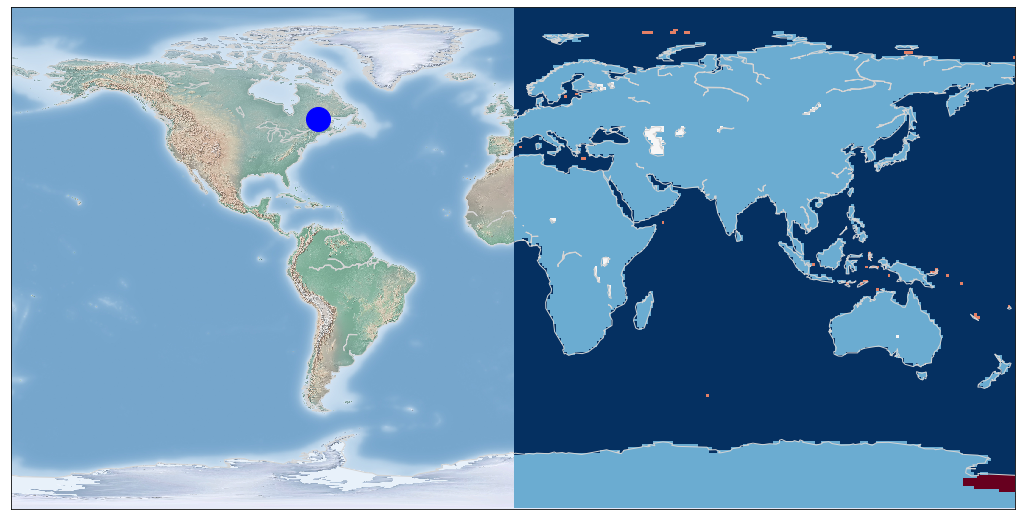

In [51]:
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief(scale=0.5)
m.pcolormesh(lslons, lslats, lsmask,
              cmap='RdBu_r')

lat = 50
lon = -70
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=24)

m.drawcoastlines(color='lightgray')




In [22]:
testdata = xr.open_dataset('16_netcdf4.nc')
testdata.variables

Frozen(OrderedDict([('var', <xarray.Variable (lat: 180, lon: 360, time: 12)>
[777600 values with dtype=float64]), ('time', <xarray.IndexVariable 'time' (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)
Attributes:
    units:     climatological months
    calendar:  gregorian), ('lat', <xarray.IndexVariable 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,